*2017.06.13*

1. 強化学習
1. Q-learning
1. Open AI Gym
1. 実装【Open AI Gymの問題をQ-Learningで学習】

---

**1. 強化学習**

---

**強化学習**

* 教師あり学習
    * 入力（質問）と出力（答え）の組からなる訓練データが与えられる状況で, 入出力の関係（関数）を学習する問題
* 教師なし学習
    * 入力（質問）のみの訓練データが与えられる状況で, 入力データの特性を学習する問題
* **強化学習**
    * 入力（質問）と**出力（答え）に対する評価（報酬）**の組からなる訓練データが与えられる状況で, どのように行動するのが良いのか, その指針を学習する問題
    
    

---

**強化学習をモデル化する**

---

**政策（Policy）**

強化学習では, ある環境に置かれたエージェントが, 現在の状態を観測し, 行動ルールに従って行動をする.  
→ 行動したことにより, エージェントは環境から報酬を受け取り, それによって行動ルールを見直していく.  

この時の行動を決めるルールに当たる指針を**政策（Policy）**という. 強化学習は, 良い政策を求める（学習する）ことを目指す.

---

**マルコフ決定過程（Markov Decision Process: MDP）**

時刻 $t$ の状態 $s_t$ において, 政策 $\pi$ により選択される行動 $a_t$ によって状態遷移確率が決まる. その結果として時刻 $t+1$ の状態 $s_{t+1}$ が決まり, 報酬 $r_{t+1}$ が得られる.  
→ 強化学習は時刻 $t$ の状態と行動のみに依存する**マルコフ決定過程（Markov Decision Process: MDP）**に基づいてモデル化できる.

マルコフ決定過程は次の要素からなるモデルとする.

$S=\{s_1, s_2, ..., s_m\}$: 状態空間（環境がとりうる状態の集合）

$A=\{a_1, a_2, ..., a_n\}$: 行動空間（エージェントがとりうる行動の集合）

$P(s_{t+1}|s_t, a_t)$: 状態遷移確率

$\pi(s, a)=P(a_t=a|s_t=s)$: 政策

$r_{t+1}=r(s_t, a_t)\in\mathcal{R}$: 報酬関数

---

**報酬**

良い政策を求める.  
= 将来に得られる報酬の期待値を最大化する政策を求める.  

将来に得られる報酬について, **累積報酬**（報酬の総計）を考える.

$\Sigma^{T}_{k=0}r_{t+k+1}$

しかし, $T\rightarrow\infty$になった時に発散してしまう可能性がある.  
→ そこで割引率 $\gamma$ をかけて, **割引累積報酬**を考える.

$\Sigma^{\infty}_{k=0}\gamma^{k}r_{t+k+1}\hspace{1em}0\leq\gamma\leq1$

$\gamma$ を小さくすると将来の報酬を低く見積もり, 影響を小さくすることになる. 通常は$0.9$などの大きめの値をとることが多い.

---

**価値関数**

 より良い政策を見つけるためには, その状態における行動の価値を正しく見積もる価値関数が必要となる.  
 → **状態価値関数** $V_{\pi}(s)$ と**行動価値関数** $Q_{\pi}(s, a)$ を考える.

**状態価値関数**: 状態$s$において, 政策 $\pi$ に従う場合に得られる割引累積報酬の期待値

$V_{\pi}(s)=E_{\pi}\left[\Sigma^{\infty}_{k=0}\gamma^{k}r_{t+k+1}|s_t=s\right]$

---

**行動価値関数**: 政策 $\pi$ に従って状態 $s$ において行動 $a$ を取った時に得られる割引累積報酬の期待値.

$Q_{\pi}(s, a)=E_{\pi}\left[\Sigma^{\infty}_{k=0}\gamma^{k}r_{t+k+1}|s_t=s, a_t=a\right]$

$V_{\pi}(s)=\Sigma_a\pi(s, a)Q_{\pi}(s, a)$

**最適行動価値関数** $Q^{*}(s, a)$: 行動価値関数を最大にする時の関数

**最適政策** $\pi^{*}$: その時の政策

$Q^{*}(s, a)=Q_{\pi^{*}}(s, a)=\max_{\pi}Q_{\pi}(s, a)$

これを求めるのが強化学習.

---

**ベルマン方程式**

マルコフ決定過程において価値関数は, 状態$s$, 行動$a$, 次の状態$s^{\prime}$を用いて次のように再帰的に表せる.（**ベルマン方程式**）

$V_{\pi}(s)=\Sigma_{a}\pi(s, a)\Sigma_{s^{\prime}}P(s_{t+1}=s^{\prime}|s_t=s, a_t=a)\left[r_{t+1}+{\gamma}V_{\pi}(s^{\prime})\right]$

$Q_{\pi}(s, a)=r(s, a)+\gamma\Sigma_{s^{\prime}}V_{\pi}(s^{\prime})P(s^{\prime}|s, a)$

$V_{\pi}(s^{\prime})=\Sigma_{a^{\prime}}\pi(s^{\prime}, a^{\prime})Q_{\pi}(s^{\prime}, a^{\prime})$

---

最適な価値関数を求める方法は下記などがある.

* SARSA法
* Actor-Critic法
* **Q-learning**

---

**2. Q-learning**

---

**Q-learning**

最適化されていない行動価値関数 $Q$ の元で行動価値を最大する行動を選択し, 状態・報酬を観測することで, 次の状態での $Q$ の値と現時点での $Q$ の値の間に生じる**TD誤差（Temporal Difference Error）**に, 収束する勢いを調整する学習率 $\alpha\hspace{0.5em}(0\leq\alpha\leq1)$ をかけて, $Q$ の値を更新していくことで,  最適行動価値関数 $Q^{*}(s, a)$ を推定する.
状態 $s_t$ のエージェントが行動 $a_t$ を選択し, 報酬 $r_{t+1}$ を得て, 状態が $s_{t+1}$ に遷移したとする. このときの行動価値関数 $Q$ の値 $Q(s_t, a_t)$ を次の式で更新する.

$Q(s_t, a_t){\leftarrow}Q(s_t, a_t)+\alpha\left\{r_{t+1}+\gamma\max_{a_{t+1}}Q(s_{t+1}, a_{t+1})-Q(s_t, a_t)\right\}$  

$\alpha$: 学習率, $\gamma$: 割引率  

通常 $\alpha$ は $0.1$ などに設定することが多い.  

---

**Q-learning のアルゴリズム**

$M$: エピソード数  
$T$: ステップ数  
$\alpha$: 学習率  
$\gamma$: 割引率

$for\hspace{0.5em}m\leftarrow1,2,...,M$  
$\hspace{2em}for\hspace{0.5em}t\leftarrow1,2,...,T$  
$\hspace{4em}$状態 $s_t$ において政策 $\pi$ に従い行動 $a_t$ を選択, 状態 $s_{t+1}$及び報酬 $r_{t+1}$ を観測  
$\hspace{4em}$// 行動価値関数の更新  
$\hspace{4em}Q(s_t, a_t){\leftarrow}Q(s_t, a_t)+\alpha\{r_{t+1}+\gamma\max_{a_{t+1}}Q(s_{t+1}, a_{t+1})-Q(s_t, a_t)\}$  
  
$\hspace{4em}$// 政策の更新  
$\hspace{4em}\pi{\leftarrow}PolicyImprove$  
$return(\pi)$

---

**$\epsilon$-greedy法**

行動価値を最大する行動を選択し続ける政策（greedy法）では, 推定される行動の価値が改善されていかない可能性がある.
そこで, 確率 $\epsilon$ で探索, 確率 $1-\epsilon$ で $Q$ の値が最大のものを選ぶことで, 「探索」も行うような政策を考える. これを**$\epsilon$-greedy法**という.

$a^{*}={\arg\max}_{a}Q(s, a)$

$
\begin{eqnarray}
\pi(a|s)=
\left\{
\begin{array}{ll}
1-\epsilon+\frac{\epsilon}{|A|} & if\hspace{0.5em}a=a^{*}\\
\frac{\epsilon}{|A|} & otherwise\\
\end{array}
\right.
\end{eqnarray}
$

---

**深層強化学習 Deep Q-network**

* Google DeepMind 『Alpha Go』

状態数や行動数が大きくて, 最適行動価値関数 $Q^{*}(s, a)$ を得ることが困難  
→ 最適行動価値関数の近似を得るために深層学習を用いる手法

---

**3. Open AI Gym**

---

**Open AI**

* https://openai.com/
* 人工知能を研究する非営利団体
* 2015年12月 設立
* 2016年4月 強化学習アルゴリズムの検証プラットフォーム『Open AI Gym』を発表

Elon Muskをはじめとする有力な実業家・投資家が参加していることから注目を集める. Seq2Seqを提案したIlya Sutskever, Segwayを発明したTrevor Blackwell, 画像の説明文生成を行ったAndrej Karpathなど, 世界的に優秀な研究員・エンジニア達が所属.

---

**Open AI Gym**

* https://gym.openai.com/  
* 強化学習アルゴリズムの検証プラットフォーム  
* 強化学習で用いる環境（行動空間, 状態空間, 報酬）を提供する
* 実装したアルゴリズムをサイトにアップロードして採点することが可能
* インストール方法: 公式GitHub https://github.com/openai/gym
* Mac/Linuxで動作
* Windowsは, Bash on Windowsで動作させることが可能

これに対して, 強化学習アルゴリズムを実装して, 環境で試す.  
→ 強化学習プログラムの評価を行うことができる.

In [1]:
import gym

env = gym.make("FrozenLake-v0") # 環境
env.reset()

print("env.observation_space: {}".format(env.observation_space))
print("env.action_space: {}".format(env.action_space))
print("")

env.render()

act = env.action_space.sample()
print("act: {}".format(act))
print("")

_, reward, done, _ = env.step(act) # return observation, reward, done, info
env.render()
print("reward: {}".format(reward))
print("")

env.observation_space: Discrete(16)
env.action_space: Discrete(4)


SFFF
FHFH
FFFH
HFFG
act: 0

  (Left)
SFFF
FHFH
FFFH
HFFG
reward: 0.0



**4. 実装**

Open AI Gymの問題をQ-Learningで学習

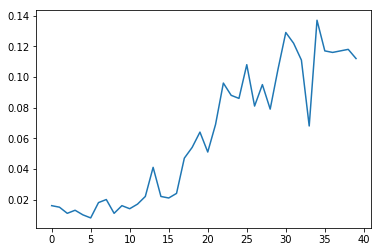

In [2]:
import gym
import numpy as np
import matplotlib.pylab as plt
 
env = gym.make("FrozenLake-v0") # 環境
n_obs = env.observation_space.n # 状態数
n_act = env.action_space.n # 行動数

q = np.zeros([n_obs, n_act]) # Q関数

epoch_cnt = 40000 # エピソード数
max_steps = 200 # 最大行動数
epsilon = 0.001
alpha = 0.1 # 学習率
gamma = 0.9 # 割引率
 
rewards = np.zeros(epoch_cnt) # 報酬を記録するリスト

for epoch in range(epoch_cnt):
    
    pobs = env.reset() # 開始の状態
    done = False # ゲームが終わったかどうかのフラグ
    
    for step in range(max_steps):
        # 現在の状態で最も価値の高い行動を選択する
        pact = np.argmax(q[pobs, :])
        pact = np.random.choice(np.where(q[pobs, :] == q[pobs, pact])[0])
        if np.random.rand() <= epsilon: # ε-greedy, 一定の確率でランダムに行動する
            pact = env.action_space.sample()
            
        obs, reward, done, _ = env.step(pact) # return observation, reward, done, info
        
        # Q関数を更新する
        if not done:
            q[pobs, pact] += alpha * (reward - q[pobs, pact] + gamma * np.max(q[obs, :]))
        else:
            q[pobs, pact] += alpha * (reward - q[pobs, pact])
            
        pobs = obs # 現在の状態を更新する
        if done:
            rewards[epoch] = reward # 報酬を記録する
            break
            
# 報酬をプロット
rates = np.average(rewards.reshape([epoch_cnt//1000, 1000]), axis = 1)
plt.plot(rates)
plt.show() 